In [13]:
from convolution import Convolution, Conv_Functions
from colorspace import ColorSpace
from imageutils import ImageUtils
from PIL import Image
import numpy as np

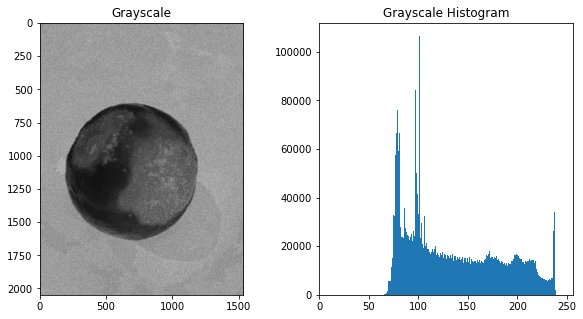

In [27]:

#ImageUtils(orange1).plot_RGB()
orange1 = Image.open("Orange/Noise/O3g9000.png").convert('RGB')
gray_orange = ColorSpace(orange1).rgb_to_grayscale()
ImageUtils(gray_orange).plot_image_with_histogram(
    title='Grayscale', color_space='Greys')


In [15]:
weight_matrix = np.full((5, 5), 1)


# min_gray = Convolution(gray_orange, 'min_grey').convolve(weight_matrix, Conv_Functions.min)


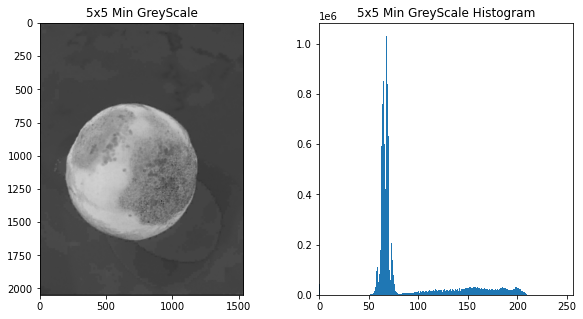

In [16]:
min_grey = ImageUtils().load_image(
    'Image/Convolution/min_grey.png')
ImageUtils(min_grey).plot_image_with_histogram('5x5 Min GreyScale', color_space='Greys')


In [17]:
# max_gray = Convolution(gray_orange, 'max_grey').convolve(weight_matrix, Conv_Functions.max, layers=[0])

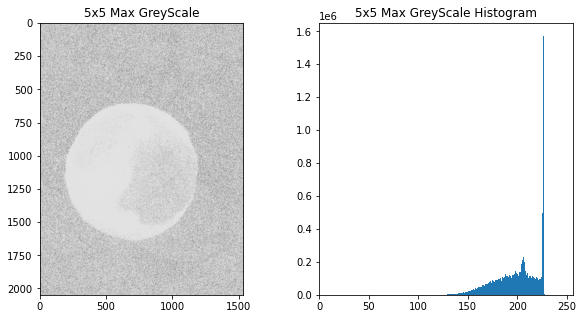

In [18]:
max_gray = ImageUtils().load_image('Image/Convolution/max_grey.png')

ImageUtils(max_gray).plot_image_with_histogram(
    '5x5 Max GreyScale', color_space='Greys')


In [19]:
# midpoint_gray = Convolution(gray_orange, 'midpoint_grey').convolve(weight_matrix, Conv_Functions.midpoint, layers=[0])

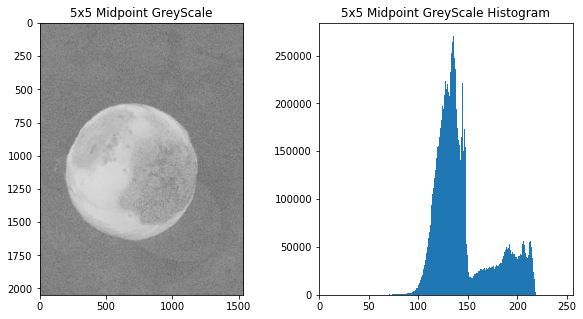

In [22]:
midpoint_gray = ImageUtils().load_image(
    'Image/Convolution/midpoint grey.png')

ImageUtils(midpoint_gray).plot_image_with_histogram(
    '5x5 Midpoint GreyScale', color_space='Greys')


In [ ]:
weight_matrix = np.full((5,5),1)

# alpha_gray = Convolution(gray_orange, 'alpha_gray').convolve(
#     weight_matrix, Conv_Functions.alpha_trim_mean)


Input image: [[ 69  85 122 ...  94  94  80]
 [105 109 202 ... 105 134  77]
 [161  70 150 ... 154 155  81]
 ...
 [ 91  91  91 ...  80  87 139]
 [104 136  92 ...  94 105  83]
 [121  98  65 ... 107 193 155]]


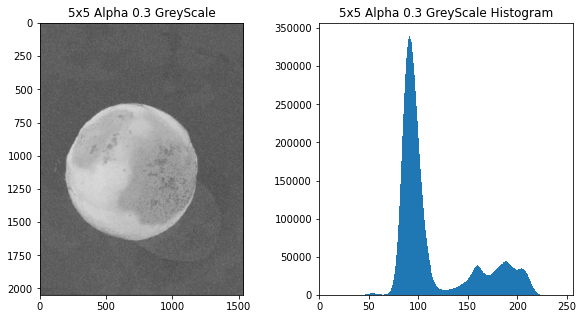

In [23]:
alpha_gray = ImageUtils().load_image(
    'Image/Convolution/alpha_gray.png')

ImageUtils(alpha_gray).plot_image_with_histogram(
    '5x5 Alpha 0.3 GreyScale', color_space='Greys')

In [ ]:
weight_matrix = np.array([[1,2,1],
                          [2,6,2],
                          [1,2,1]])

# weightedmedian_gray = Convolution(gray_orange, 'weightedmedian_gray').convolve(
#     weight_matrix, Conv_Functions.weighted_median)


Input image: [[ 69  85 122 ...  94  94  80]
 [105 109 202 ... 105 134  77]
 [161  70 150 ... 154 155  81]
 ...
 [ 91  91  91 ...  80  87 139]
 [104 136  92 ...  94 105  83]
 [121  98  65 ... 107 193 155]]


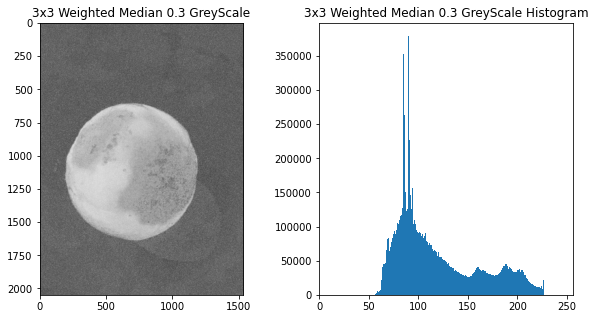

In [26]:
weightedmedian_gray = ImageUtils().load_image(
    'Image/Convolution/weightedmedian_gray.png')

ImageUtils(weightedmedian_gray).plot_image_with_histogram('3x3 Weighted Median 0.3 GreyScale', color_space='Greys')


In [ ]:
from noiseestimators import NoiseEstimator

noise = ImageUtils().load_image(
    'Image/Convolution/weightedmediannoise.png')

#noise.shape
NoiseEstimator(noise).gaussian_mean_var_estimator()

Layer 0: Mean = 20.15234375, Variance = 6851.808822631836
Layer 1: Mean = 20.15234375, Variance = 6851.808822631836
Layer 2: Mean = 20.15234375, Variance = 6851.808822631836


(array([20.15234375, 20.15234375, 20.15234375]),
 array([6851.80882263, 6851.80882263, 6851.80882263]))

In [30]:
weight_matrix = np.array([[-1,0,-1,0,-1],
                          [0,-1,-1,-1,0],
                          [-1,-1,20,-1,-1],
                          [0,-1,-1,-1,0],
                          [-1,0,-1,0,-1]])

sharp = Convolution(gray_orange, 'sharp').convolve(weight_matrix, Conv_Functions.weighted_arithmetic_mean)

Input image: [[ 83 103 162 ... 139  80  80]
 [208 203  93 ... 104  85  80]
 [104 104 177 ...  80 104  84]
 ...
 [ 76 126 102 ...  90 112 104]
 [162 134 163 ...  90 169  89]
 [ 76 135  76 ... 131 152 119]]


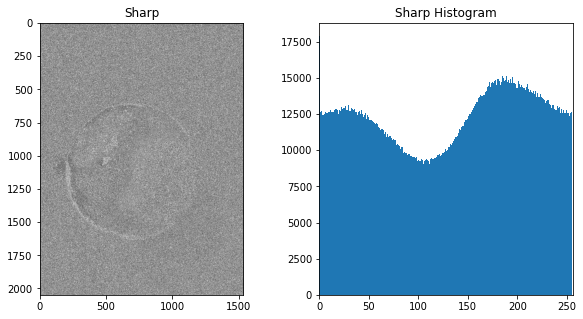

In [31]:
ImageUtils(sharp).plot_image_with_histogram(title="Sharp")

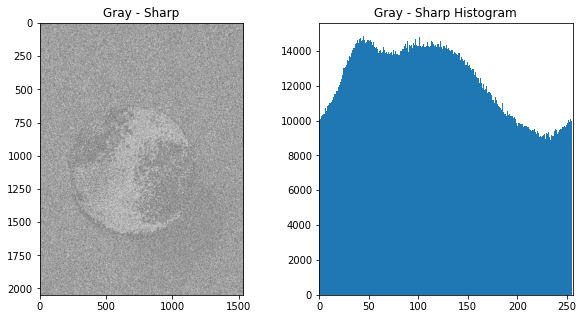

In [34]:
ImageUtils(np.expand_dims(gray_orange, axis=2)-sharp).plot_image_with_histogram(title="Gray - Sharp")


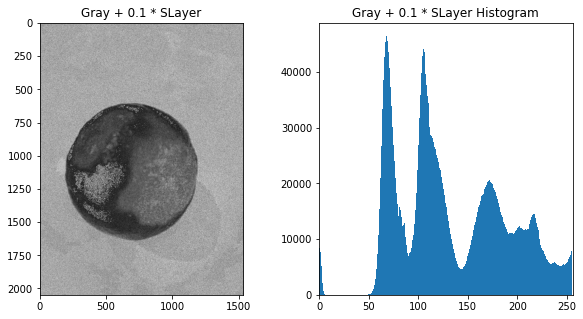

In [40]:
ImageUtils(np.expand_dims(gray_orange, axis=2) + 0.1*(np.expand_dims(gray_orange, axis=2) - sharp)).plot_image_with_histogram(title="Gray + 0.1 * SLayer")
